In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Data file 1: Sum of IDP arrival across governorates in the year 2016
## prepared data exported to csv and used as the initial IDP population for Syria simulation

In [30]:
df = pd.read_csv('data/syria/idp_data/idpPop_2016.csv', delimiter=";")
headers = df.iloc[0].values
df.columns = headers
df.drop(index=0, axis=0, inplace=True)
df = df[['Governorate','Total 2016']]
df.drop(index=df.index[-1],axis=0,inplace=True)
df = df.rename(columns={'Governorate': 'Region', 'Total 2016': 'IDPs'})
df['IDPs'] = df['IDPs'].str.replace('.', '')
df.IDPs = df.IDPs.astype(int)
df

C:\Users\vivia\AppData\Local\Temp\ipykernel_25668\2870240176.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['IDPs'] = df['IDPs'].str.replace('.', '')


,Region,IDPs
1,Aleppo,821749
2,Al-Hasakeh,59501
3,Ar-Raqqa,65314
4,As-Sweida,12833
5,Damascus,24579
6,Dar'a,221962
7,Deir-ez-Zor,42744
8,Hama,51946
9,Homs,63188
10,Idleb,528596


In [31]:
#df.to_csv('idp_pop_2016.csv')

# Data file 2: IDPs per governorate in January 2017


In [32]:
df2 = pd.read_csv('data/syria/idp_data/idpFlow_jan2017.csv', delimiter=";")
df2 = df2[['D_Governorate','Estimated IDP Arrivals']]
df2 = df2.dropna(axis=0)
df2 = df2.rename(columns={'D_Governorate': 'Region', 'Estimated IDP Arrivals': 'IDPs'})
df2.IDPs = df2.IDPs.astype(int)
df2 = df2.groupby(["Region"])["IDPs"].sum().reset_index()
df2 = df2.sort_values('IDPs')


C:\Users\vivia\AppData\Local\Temp\ipykernel_25668\487442520.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data/syria/idp_data/idpFlow_jan2017.csv', delimiter=";")


## Create IDP population density map and bar chart for scenario 1

<AxesSubplot:>

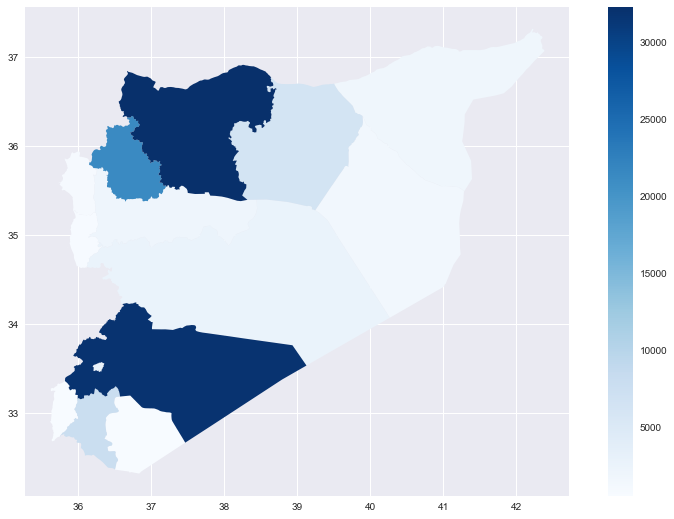

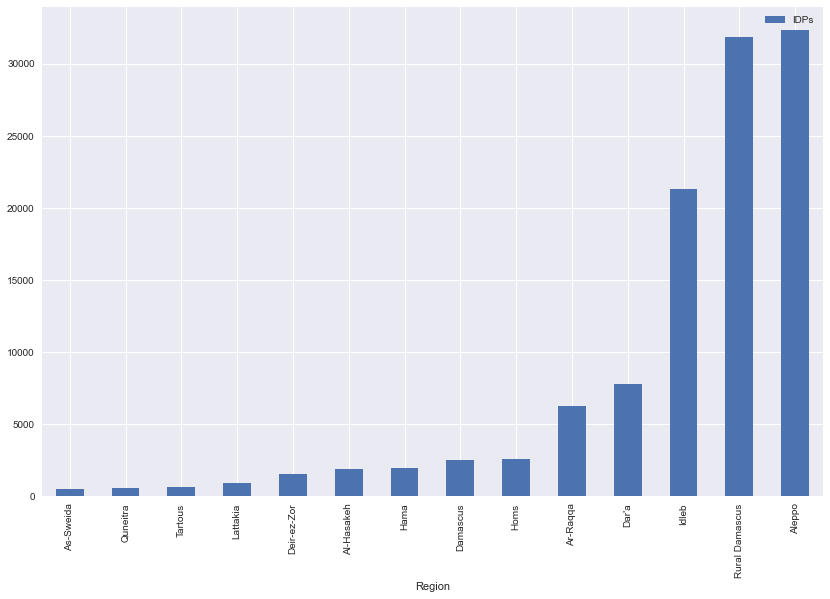

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

df1 = gpd.read_file('data/syria/syrian_districts_1.geojson')
df1.rename(columns = {'ADM1_EN':'Region'}, inplace = True)

df_refPop = df2
df_merge_refPop  = df1.merge(df_refPop, on='Region', how='left')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 9]
fig, ax = plt.subplots()
df_merge_refPop = df_merge_refPop.sort_values('IDPs')
df_merge_refPop.plot.bar(x='Region', y='IDPs')
df_merge_refPop.plot(ax=ax, column='IDPs', cmap='Blues',legend=True)


In [34]:
#fig.savefig('actual_scen1_map')

# Data from February 2017
## Available data: IDP arrival numbers per governorate

In [35]:
df3 = pd.read_csv('data/syria/idp_data/idpFlow_feb2017.csv', delimiter=";")
df3 = df3[['D_Governorate','D_District','D_Sub_District','IDP_Flow_Estimation']]
df3 = df3.dropna(axis=0)
df3 = df3.rename(columns={'D_Governorate': 'Region', 'IDP_Flow_Estimation': 'IDPs'})
df3

,Region,D_District,D_Sub_District,IDPs
0,Damascus,Damascus,Damascus,7853
1,Aleppo,Jebel Saman,Atareb,20
2,Aleppo,Jebel Saman,Atareb,15
3,Aleppo,Jebel Saman,Atareb,50
4,Aleppo,Jebel Saman,Atareb,100
...,...,...,...,...
1022,Dar'a,Dar'a,Dar'a,2005
1023,Dar'a,Dar'a,Dar'a,1721
1024,Dar'a,Dar'a,Dar'a,158
1025,Dar'a,Dar'a,Dar'a,677


# Adding IDP arrivals of February and January to sum of IDP arrivals of 2016 to run the scenario in March 2017

In [36]:
df = pd.read_csv('data/syria/idp_data/idpPop_2016.csv', delimiter=";")
headers = df.iloc[0].values
df.columns = headers
df.drop(index=0, axis=0, inplace=True)
df = df[['Governorate','Total 2016']]
df.drop(index=df.index[-1],axis=0,inplace=True)
df = df.rename(columns={'Governorate': 'Region', 'Total 2016': 'IDPs'})
df['IDPs'] = df['IDPs'].str.replace('.', '')
df.IDPs = df.IDPs.astype(int)
df = df.sort_values('IDPs')

merge1_2 = df.merge(df2, on='Region', how='left')
merge1_2_3 = merge1_2.merge(df3, on='Region',how='left')
print(merge1_2_3)
print('-----------------------------------')
merge1_2_3.IDPs = merge1_2_3['IDPs']+ merge1_2_3['IDPs_x'] + merge1_2_3['IDPs_y']
init_data_scen = merge1_2_3[['Region', 'IDPs']]
print(init_data_scen)
init_data_scen['IDPs'].sum()
#init_data_scen.to_csv('idpPop_16_01_02_17.csv')

        Region  IDPs_x  IDPs_y D_District D_Sub_District  IDPs
0     Quneitra    7007     554   Quneitra       Quneitra     0
1     Quneitra    7007     554   Quneitra       Quneitra     0
2     Quneitra    7007     554   Quneitra       Quneitra     0
3     Quneitra    7007     554   Quneitra       Quneitra     0
4     Quneitra    7007     554   Quneitra       Quneitra     0
...        ...     ...     ...        ...            ...   ...
1022    Aleppo  821749   32319     Menbij         Menbij    18
1023    Aleppo  821749   32319     Menbij         Menbij    50
1024    Aleppo  821749   32319      A'zaz          A'zaz   125
1025    Aleppo  821749   32319     Al Bab         Al Bab  2965
1026    Aleppo  821749   32319     Menbij         Menbij  4702

[1027 rows x 6 columns]
-----------------------------------
        Region    IDPs
0     Quneitra    7561
1     Quneitra    7561
2     Quneitra    7561
3     Quneitra    7561
4     Quneitra    7561
...        ...     ...
1022    Aleppo  854086

C:\Users\vivia\AppData\Local\Temp\ipykernel_25668\1029350760.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['IDPs'] = df['IDPs'].str.replace('.', '')


425068715

# Data from March 2017
# Data Preparation: Create 3 separate data frame for adm level 1-3
## Each data frame contains the IDP population per administrative unit for March 2017
## Create IDP population density maps and bar charts for scenarios

In [37]:
df_mar = pd.read_csv('data/syria/idp_data/idpFlow_mar2017.csv', delimiter=";")
df_mar = df_mar[['D_Governorate','D_District','D_Sub_District','IDP_Flow_Estimation']]
df_mar = df_mar.dropna(axis=0)
df_mar = df_mar.rename(columns={'D_Governorate': 'Region1','D_District':'Region2','D_Sub_District':'Region3', 'IDP_Flow_Estimation': 'IDPs'})
df_mar.IDPs = df_mar.IDPs.astype(int)


In [38]:
df_mar_3 = df_mar.groupby(["Region1","Region2","Region3"])["IDPs"].sum().reset_index()
df_mar_3 = df_mar_3.sort_values('IDPs')
df_mar_3 = df_mar_3[['Region3', 'IDPs']]
df_initPop = pd.read_csv('data/syria/idp_data/SyrInitPopadm3.csv')

merged_df = df_mar_3.merge(df_initPop, left_on='Region3', right_on='Region', how='inner')

# Add the "InitPop" values to the "IDPs" values
merged_df['IDPs'] = merged_df['IDPs'] + merged_df['InitPop']

# Drop the "Region" column from the merged DataFrame 
merged_df = merged_df.drop(columns=['Region'])
df_mar_3 = merged_df

In [39]:
df_mar_2 = df_mar.groupby(["Region1","Region2"])["IDPs"].sum().reset_index()
df_mar_2 = df_mar_2.sort_values('IDPs')
df_mar_2 = df_mar_2[['Region2', 'IDPs']]
df_initPop = pd.read_csv('data/syria/idp_data/SyrInitPopadm2.csv')

merged_df = df_mar_2.merge(df_initPop, left_on='Region2', right_on='Region', how='inner')

# Add the "InitPop" values to the "IDPs" values
merged_df['IDPs'] = merged_df['IDPs'] + merged_df['InitPop']

# Drop the "Region" column from the merged DataFrame 
merged_df = merged_df.drop(columns=['Region'])
df_mar_2 = merged_df


# Create density maps and bar charts for scenarios 1-3

### ADM1

<AxesSubplot:>

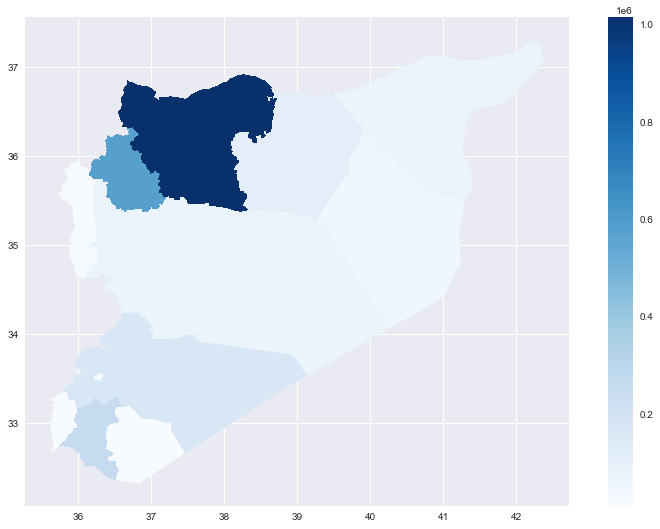

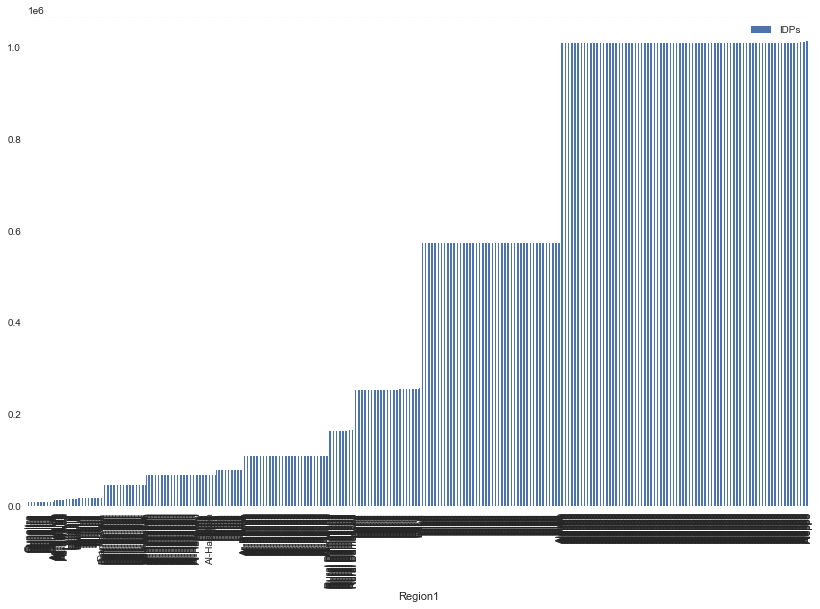

In [40]:
df_mar_1 = df_mar.groupby(["Region1"])["IDPs"].sum().reset_index()
df_mar_1 = df_mar_1.sort_values('IDPs')
df_mar_1 = df_mar_1[['Region1', 'IDPs']]
df_init_data1_mar1 = pd.merge(init_data_scen, df_mar_1, how='left', left_on=['Region'], right_on=['Region1'])
df_init_data1_mar1['IDPs'] = df_init_data1_mar1['IDPs_x'] + df_init_data1_mar1['IDPs_y']
df_init_data1_mar1[['Region1','IDPs']]

df_map_3 = gpd.read_file('data/syria/syrian_districts_1.geojson')
df_map_3.rename(columns = {'ADM1_EN':'Region1'}, inplace = True)

df_merge_idp_1  = df_map_3.merge(df_init_data1_mar1, on='Region1', how='left')



plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 9]
fig, ax = plt.subplots()
df_merge_idp_1 = df_merge_idp_1.sort_values('IDPs')
df_merge_idp_1.plot.bar(x='Region1',y='IDPs')
df_merge_idp_1.plot(ax=ax, column='IDPs', cmap='Blues',legend=True)
#fig.savefig("actual_march_adm1.png")

### ADM3

<AxesSubplot:>

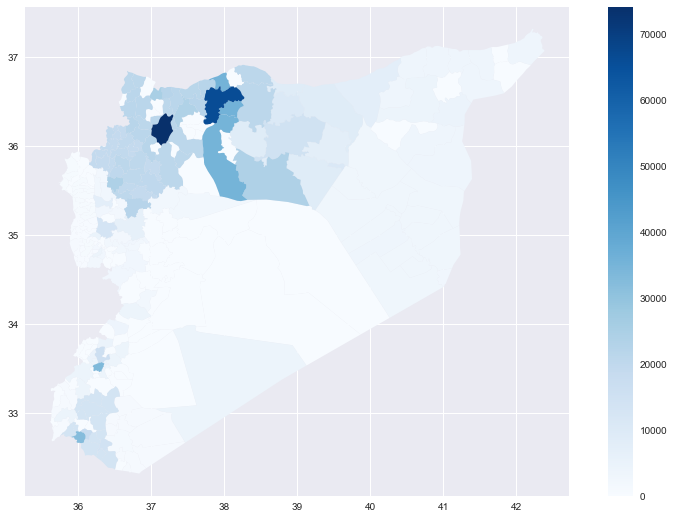

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

df_map_3 = gpd.read_file('data/syria/syrian_districts_3.geojson')
df_map_3.rename(columns = {'ADM3_EN':'Region3'}, inplace = True)
df_map_3.rename(columns = {'ADM2_EN':'Region2'}, inplace = True)
df_map_3.rename(columns = {'ADM1_EN':'Region1'}, inplace = True)

df_merge_idp  = df_map_3.merge(df_mar_3, on='Region3', how='left')
df_merge_idp['IDPs'] = df_merge_idp['IDPs'].fillna(0)


plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 9]
fig, ax = plt.subplots()
df_merge_idp = df_merge_idp.sort_values('IDPs')
df_merge_idp.plot(ax=ax, column='IDPs', cmap='Blues',legend=True)
#fig.savefig("actual_march_adm3.png")

### ADM2

<AxesSubplot:>

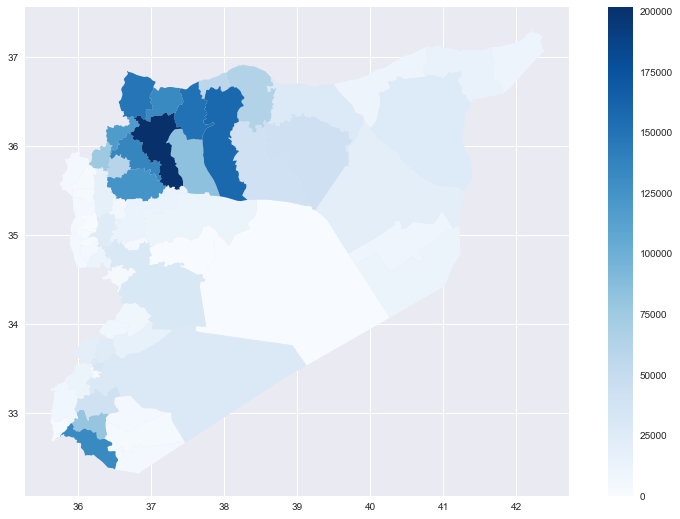

In [42]:
df_map_3 = gpd.read_file('data/syria/syrian_districts_2.geojson')
df_map_3.rename(columns = {'ADM2_EN':'Region2'}, inplace = True)
df_map_3.rename(columns = {'ADM1_EN':'Region1'}, inplace = True)

df_merge_idp_2  = df_map_3.merge(df_mar_2, on='Region2', how='left')
df_merge_idp_2['IDPs'] = df_merge_idp_2['IDPs'].fillna(0)


plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 9]
fig, ax = plt.subplots()
df_merge_idp_2 = df_merge_idp_2.sort_values('IDPs')
df_merge_idp_2.plot(ax=ax, column='IDPs', cmap='Blues',legend=True)
#fig.savefig("actual_march_adm2")

# Preparing IDP routes data from March 2017 for scenario 4

In [43]:
df4 = pd.read_csv('data/syria/idp_data/idpRoutes_mar2017.CSV', delimiter=";")
df4

,From,Aleppo,Al-Hasakeh,Ar-Raqqa,As-Sweida,Damascus,Dar'a,Deir-ez-Zor,Hama,Homs,Idleb,Lattakia,Quneitra,Rural Damascus,Tartous,Total
0,Aleppo,148.593,1.522,3.875,NaN,14.000,NaN,21.000,77.000,27.000,7.136,NaN,NaN,123.000,71.000,161.459
1,Al-Hasakeh,83.000,554.000,NaN,15.0,45.000,NaN,119.000,NaN,16.000,NaN,NaN,NaN,NaN,4.000,836.000
2,Ar-Raqqa,1.343,4.426,33.641,25.0,3.000,NaN,752.000,105.000,NaN,330.000,NaN,NaN,250.000,NaN,40.875
3,As-Sweida,NaN,NaN,NaN,87.0,NaN,NaN,18.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.000
4,Damascus,186.000,NaN,NaN,185.0,2.514,NaN,NaN,198.000,NaN,552.000,35.0,NaN,13.290,29.000,16.989
5,Dar'a,13.000,NaN,NaN,103.0,12.000,50.000,12.000,NaN,NaN,102.000,NaN,NaN,NaN,NaN,292.000
6,Deir-ez-Zor,775.000,49.000,NaN,52.0,48.000,NaN,964.000,10.000,NaN,30.000,10.0,NaN,25.000,14.000,1.977
7,Hama,82.000,NaN,NaN,NaN,101.000,NaN,NaN,24.927,2.272,11.184,250.0,NaN,NaN,2.942,41.758
8,Homs,3.331,NaN,NaN,41.0,97.000,16.000,8.000,375.000,470.000,207.000,20.0,NaN,NaN,9.000,4.574
9,Idleb,991.000,NaN,NaN,55.0,16.000,NaN,NaN,108.000,NaN,4.670,50.0,NaN,NaN,14.000,5.904


In [44]:
# Clean data
df4 = df4.fillna(0)
df4 = df4.astype(str)
cols = list(df4.columns)
cols.pop(0)

for col in cols:
    df4[col] = df4[col].str.replace('.', '')
    df4[col] = df4[col].str.replace('00', '0')
    df4[col] = df4[col].astype(int)
    
df4    


C:\Users\vivia\AppData\Local\Temp\ipykernel_25668\1924020089.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4[col] = df4[col].str.replace('.', '')


,From,Aleppo,Al-Hasakeh,Ar-Raqqa,As-Sweida,Damascus,Dar'a,Deir-ez-Zor,Hama,Homs,Idleb,Lattakia,Quneitra,Rural Damascus,Tartous,Total
0,Aleppo,148593,1522,3875,0,140,0,210,770,270,7136,0,0,1230,710,161459
1,Al-Hasakeh,830,5540,0,150,450,0,1190,0,160,0,0,0,0,40,8360
2,Ar-Raqqa,1343,4426,33641,250,30,0,7520,1050,0,330,0,0,250,0,40875
3,As-Sweida,0,0,0,870,0,0,180,0,0,0,0,0,0,0,1050
4,Damascus,1860,0,0,1850,2514,0,0,1980,0,5520,350,0,1329,290,16989
5,Dar'a,130,0,0,1030,120,50,120,0,0,1020,0,0,0,0,2920
6,Deir-ez-Zor,7750,490,0,520,480,0,9640,10,0,30,10,0,250,140,1977
7,Hama,820,0,0,0,1010,0,0,24927,2272,11184,250,0,0,2942,41758
8,Homs,3331,0,0,410,970,160,80,3750,470,2070,20,0,0,90,4574
9,Idleb,9910,0,0,550,160,0,0,1080,0,467,50,0,0,140,5904


In [45]:
df4_drop_totals_and_cols = df4_drop_cols[:-1]
df4_drop_totals_and_cols

NameError: name 'df4_drop_cols' is not defined

In [ ]:
df4_max = df4_drop_totals_and_cols
df4_max['max']= df4_max.max(axis=1)
df4_max
max_col = df4_max['max']

In [ ]:
df4_drop_totals_and_cols = df4_drop_totals_and_cols[df4_drop_totals_and_cols.columns[:-1]]
df4_drop_totals_and_cols

## What is the most common destination when originating from each governorate in March 2017?

In [ ]:
# Needed is a list of lists
# Each list has format [OriginName, DestinationName, Number]

data = []
for row_idx, row in df4_drop_totals_and_cols.iterrows():
    temp = []
    temp.append(df4['From'][row_idx])
    temp.append(row[row==max_col[row_idx]].index[0])
    temp.append(max_col[row_idx])
    data.append(temp)
    

    
df_idp_routes = pd.DataFrame(data, columns=['Origin', 'Destination', 'Number'])    
df_idp_routes.sort_values('Number', ascending=False).reset_index(inplace=True)

# Prepare data to be shown on map: Remove Unknown Origin!
top_20_routes = df_idp_routes.nlargest(20, 'Number').reset_index()
top_20_routes = top_20_routes.drop(top_20_routes[top_20_routes['Origin']=='Unknown' ].index)
top_20_routes

### The above table shows the most common destination for each governorate in March 2017 as well as the number of IDP arrivals for each route.

### Routes with the same origin and destinations represent returnees

# 

## Show most common Syrian IDP routes of March 2017 on map
### Green dots without lines represent governorates whose IDP arrivals are returnees

In [ ]:
import geopandas as gpd
df2 = gpd.read_file('data/syria/syrian_districts_1.geojson')
df2.rename(columns = {'ADM1_EN':'Region'}, inplace = True)

In [ ]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 11]
fig, ax = plt.subplots()
df2.plot(ax=ax, color='orange', alpha=0.8)



x_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Origin]
y_values_origins =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Origin]
print(y_values_origins)
names_origins = [i for i in top_20_routes.Origin]

x_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.x for i in top_20_routes.Destination]
y_values_destinations =  [df2.loc[df2['Region'] == i]['geometry'].centroid.y for i in top_20_routes.Destination]
names_destinations = [i for i in top_20_routes.Destination]

for i, j, l in zip(x_values_origins, y_values_origins, names_origins):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "red",
        alpha = 1.0
        )
    
    

for i, j, l in zip(x_values_destinations, y_values_destinations, names_destinations):
    ax.text(
       x=i,
       y=float(j) + 0.1,
       s=l,
       fontsize = 12,
       ha = "center",
       )
        
    ax.plot(
        i,
        j,
        marker = "o",
        c = "green",
        alpha = 1.0
        )



for i, j, l, t in zip(x_values_origins, x_values_destinations, y_values_origins, y_values_destinations):
    plt.plot([i,j], [l,t], linewidth = 1, linestyle = "--", color = "black")

In [ ]:
#fig.savefig("actual_march_routes.png")